<h2> Mengumpulkan library yang diperlukan </h2>

In [174]:
# !pip install pandas
# !pip install re
# !pip install matplotlib
# !pip install seaborn
# !pip install numpy


import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

<h2> Mengimport data yang berupa file CSV dari lokal </h2>

In [175]:
df = pd.read_csv('data.csv', encoding = 'latin-1')
kamus_abusive = pd.read_csv('abusive.csv', encoding = 'latin-1')
kamus_alay = pd.read_csv('new_kamusalay.csv', encoding = 'latin-1', header= None)
kamus_alay = kamus_alay.rename(columns={0: 'tulisan awal', 1: 'pengganti'})

In [176]:
# Menampilkan data

df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [178]:
df.head(20)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


In [179]:
df.tail(15)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13154,Adik tengok sekeliling. Macam mana adik nak ca...,0,0,0,0,0,0,0,0,0,0,0,0
13155,USER USER Makannya w suruh baca APBN ..biar ga...,1,1,1,0,0,0,0,0,1,1,0,0
13156,Presiden Joko Widodo (Jokowi) masuk daftar The...,0,0,0,0,0,0,0,0,0,0,0,0
13157,"USER Pak Recep..............anda salah, itu gu...",1,0,1,0,0,0,0,0,1,1,0,0
13158,Maaf sianu mah cocoknya sama mustafa kemal alm...,0,0,0,0,0,0,0,0,0,0,0,0
13159,Ada 2 buku aktivitas Angry Birds the Movie yan...,0,0,0,0,0,0,0,0,0,0,0,0
13160,[NOSTALGIA DENGAN BUDAYA]; ; nosÂ·talÂ·gia n k...,0,0,0,0,0,0,0,0,0,0,0,0
13161,brengsek itu orang terbuat dr apa bikin gue be...,1,1,1,0,0,0,0,0,1,1,0,0
13162,Kapolda Babi! Biadap dan Bodoh! Gak punya otak...,1,1,0,1,0,0,0,0,1,0,1,0
13163,"Orang Yahudi, Kristen dan Muslim yang belum pe...",0,0,0,0,0,0,0,0,0,0,0,0


In [180]:
df.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [181]:
df.duplicated().sum()

125

In [182]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13164    False
13165    False
13166    False
13167    False
13168    False
Length: 13169, dtype: bool

In [183]:
df = df.drop_duplicates()

In [184]:
df.duplicated().sum()

0

In [185]:
def sentiment(x):
    if x['HS'] == 1 and x['Abusive'] == 1:
        return 'Negative'
    elif x['HS'] == 1 and x['Abusive'] == 0:
        return 'Negative'
    elif x['HS'] == 0 and x['Abusive'] == 1:
        return 'Negative'
    else:
        return 'Positive'

df['Sentiment'] = df.apply(sentiment, axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_1508\1937194545.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df.apply(sentiment, axis=1)


In [186]:
df['Sentiment'].value_counts()

Sentiment
Negative    7261
Positive    5783
Name: count, dtype: int64

In [187]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Sentiment
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Negative
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Negative
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,Positive
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,Positive
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,Negative
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,Negative
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,Positive
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,Positive


<Axes: ylabel='count'>

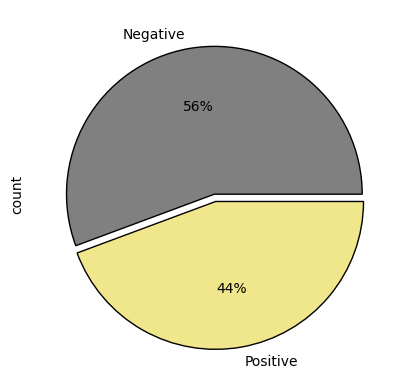

In [188]:
df['Sentiment'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['grey','khaki'], explode = (0, 0.05), wedgeprops = {'linewidth': 1, 'edgecolor': "black"})

In [189]:
def toxic(x):
    if x['HS'] == 1 and x['Abusive'] == 1:
        return 'Hate Speech & Abusive'
    elif x['HS'] == 1 and x['Abusive'] == 0:
        return 'Hate Speech'
    elif x['HS'] == 0 and x['Abusive'] == 1:
        return 'Abusive'
    else:
        return 'Neutral'

df['Type'] = df.apply(toxic, axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_1508\178297453.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df.apply(toxic, axis=1)


In [190]:
df['Type'].value_counts()

Type
Neutral                  5783
Hate Speech & Abusive    3262
Hate Speech              2256
Abusive                  1743
Name: count, dtype: int64

<Axes: ylabel='count'>

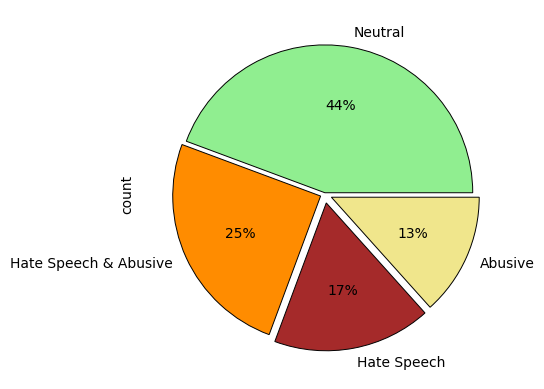

In [191]:
df['Type'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['lightgreen','darkorange','brown','khaki'], explode = (0.01, 0.03, 0.06, 0.05), wedgeprops = {'linewidth': 0.7, 'edgecolor': "black"} )

In [194]:
def HStopic(x):
    if x['HS_Religion'] == 1:
        return 'Religion'
    elif x['HS_Race'] == 1:
        return 'Race'
    elif x['HS_Physical'] == 1:
        return 'Physical'
    elif x['HS_Gender'] == 1:
        return 'Gender' 
    else:
        return 'Other'
    
df['Topic'] = df.apply(HStopic, axis = 1)

C:\Users\dell\AppData\Local\Temp\ipykernel_1508\333221646.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topic'] = df.apply(HStopic, axis = 1)


In [196]:
df['Topic']

0           Other
1           Other
2           Other
3           Other
4        Religion
           ...   
13164    Physical
13165       Other
13166       Other
13167       Other
13168       Other
Name: Topic, Length: 13044, dtype: object

In [198]:
filter = df['Topic'] == 'Other'

In [199]:
df[~filter]['Topic'].value_counts()

Topic
Religion    789
Race        469
Physical    302
Gender      252
Name: count, dtype: int64

In [193]:
df['Topic'].value_counts()

Topic
Other       11232
Religion      789
Race          469
Physical      302
Gender        252
Name: count, dtype: int64

Membuat dataframe baru untuk eksplorasi topic yang dibahas pada tweet toxic

In [153]:
df_topic = df[df['Sentiment'] != 'negative'].reset_index()

In [154]:
def HStopic(x):
    if x['HS_Religion'] == 1:
        return 'Religion'
    elif x['HS_Race'] == 1:
        return 'Race'
    elif x['HS_Physical'] == 1:
        return 'Physical'
    elif x['HS_Gender'] == 1:
        return 'Gender' 
    else:
        return 'Other'
    
df_topic['Topic'] = df_topic.apply(HStopic, axis = 1)

In [155]:
df_topic = pd.DataFrame(df_topic, columns=['index', 'Topic'])


df_topic.head()

,index,Topic
0,0,Other
1,1,Other
2,2,Other
3,3,Other
4,4,Religion


In [159]:
plt.figure(figsize=(12, 6))

plots = sns.countplot(x='Sentiment', hue='Topic' ,data=df, palette='Set2', edgecolor='black')

for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 10),
                   textcoords='offset points')

plt.ylim(0,3000)
plt.title('Hate Speech Topic and Level',fontsize=14)
plt.show()

ValueError: Could not interpret value `Topic` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [126]:
data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Sentiment,Type
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Negative,Hate Speech & Abusive
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Negative,Abusive
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,Positive,Neutral
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,Positive,Neutral
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,Negative,Hate Speech & Abusive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,Negative,Hate Speech & Abusive
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,Negative,Abusive
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,Positive,Neutral
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,Positive,Neutral


In [127]:
kamus_abusive

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


In [128]:
kamus_alay

,tulisan awal,pengganti
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


<h2> Data Cleaning </h2>

In [89]:
def lower(text):
    return text.lower()
    
def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('\s+',' ',text) # Remove every '\n'
    text = re.sub('\t+',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ',text) 
    return text

kamus_alay_map = dict(zip(kamus_alay['tulisan awal'], kamus_alay['pengganti']))
def normalisasi_alay(text):
    return ' '.join([kamus_alay_map[word] if word in kamus_alay_map else word for word in text.split(' ')])

In [90]:
def preprocess(text):
    text = lower(text) # 1
    text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 2
    text = normalisasi_alay(text) # 3
    return text

In [91]:
data['Tweet'] = data['Tweet'].apply(preprocess)

In [95]:
print("Shape: ", data.shape)
data.head(15)

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0
5,ya bani taplak dan kawan kawan xf0 x9f x98 x8...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilihan kepala daerah 2018 aman dan ...,0,0,0,0,0,0,0,0,0,0,0,0
7,gue baru saja selesai re watch aldnoah zero pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,nah admin belanja satu lagi po terbaik nak mak...,0,0,0,0,0,0,0,0,0,0,0,0
9,enak lagi kalau sambil ngewe,0,1,0,0,0,0,0,0,0,0,0,0


In [96]:
print(data['Tweet'].head(30))

0      di saat semua cowok berusaha melacak perhatia...
1      siapa yang telat memberi tau kamu edan sarap ...
2     41 kadang aku berpikir kenapa aku tetap percay...
3      aku itu aku dan ku tau matamu sipit tapi dili...
4      kaum cebong kafir sudah kelihatan dongoknya d...
5      ya bani taplak dan kawan kawan xf0 x9f x98 x8...
6     deklarasi pilihan kepala daerah 2018 aman dan ...
7     gue baru saja selesai re watch aldnoah zero pa...
8     nah admin belanja satu lagi po terbaik nak mak...
9                         enak lagi kalau sambil ngewe 
10    setidaknya gue punya jari tengah buat kamu seb...
11     banci kaleng malu tidak bisa jawab pe anyaan ...
12    kalau belajar ekonomi mestinya jago memprivati...
13    aktor huru hara 98 prabowo si ingin lengserkan...
14     bu guru enakan jadi jablay atau guru sekolah ...
15     lawan bicara gue tidak intelek kayak kamu yan...
16          belakangan ini kok pikiran ampas banget ya 
17    ari sama beki adalah rapi monyet xf0 x9f x

In [97]:
data.to_csv('preprocessed_indonesian_toxic_tweet.csv', index=False)